In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Two dice rolling game
- Throw 2 dices and observe their outcome(sum of both)

In [6]:
outcome_df = pd.DataFrame(list(range(1,7)))

#allowing sampling of the same row more than once.
#2 indicates two dices sample

possible_outcome = outcome_df.sample(2,replace=True).sum().loc[0] 
print('Sum of 2 dices outcome:',possible_outcome)

Sum of 2 dices outcome: 8


In [7]:
print('Outcome for 10 experiements:',*[outcome_df.sample(2,replace=True).sum().loc[0] for i in range(10)],sep='  ')

Outcome for 10 experiements:  10  11  7  4  4  6  10  3  11  11


### Distribution for 100 outcomes

$Relative Frequency = Frequency/Number Of Trails$ 

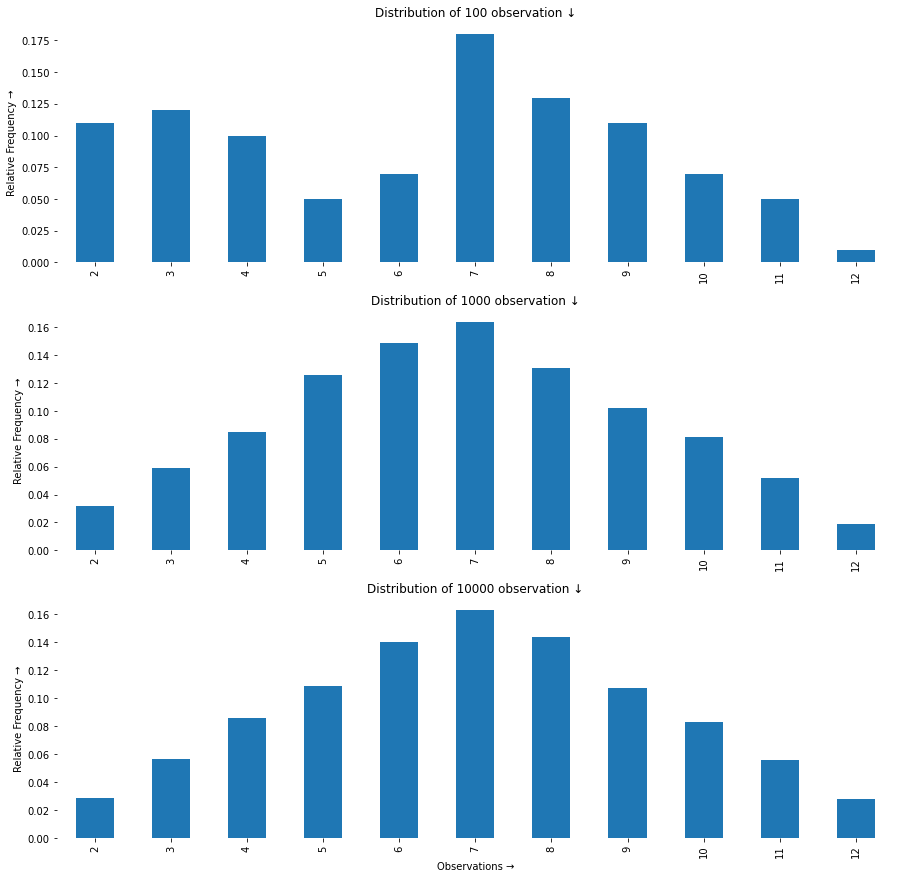

In [34]:
#PMF for discrete r.v. 
for index,value in enumerate([100,1000,10000]):
    plt.subplot(3,1,index+1,frameon=False)
    outcome = pd.DataFrame([outcome_df.sample(2,replace=True).sum().loc[0] for i in range(value)])[0]
    outcome_relative_frequency = outcome.value_counts().sort_index()/value
    outcome_relative_frequency.plot(kind='bar',figsize=(15,15))
    plt.title('Distribution of '+str(value)+' observation ↓')
    plt.ylabel('Relative Frequency →')
_ = plt.xlabel('Observations →')

In [39]:
Experiments = 100000
outcome = pd.DataFrame([outcome_df.sample(2,replace=True).sum().loc[0] for i in range(Experiments)])[0]
outcome_relative_frequency = outcome.value_counts().sort_index()/Experiments

<AxesSubplot:title={'center':'Cumulative Distribution Function'}, xlabel='Outcomes', ylabel='Probability'>

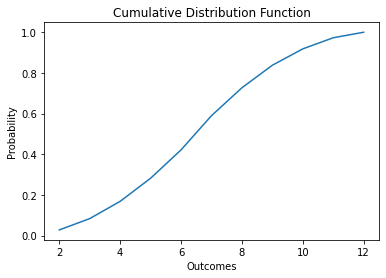

In [40]:
pd.DataFrame(np.cumsum(outcome_relative_frequency))\
    .reset_index()\
    .plot(
        x='index',
        y=0,
        title='Cumulative Distribution Function',
        legend=False,
        xlabel = 'Outcomes',
        ylabel = 'Probability'
    )